In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\97150\\OneDrive\\Desktop\\personal\\UDEMY\\Machine learning 2021\\DATA\\Advertising.csv")

In [14]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [3]:
X=df.drop('sales',axis=1)
y=df['sales']

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
train_rmse=[]
test_rmse=[]

for d in range(1,9):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_feat=poly_converter.fit_transform(X)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=101)
    
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    from sklearn.metrics import mean_squared_error
    
    train_pred_error=np.sqrt(mean_squared_error(train_pred,y_train))
    test_pred_error=np.sqrt(mean_squared_error(test_pred,y_test))
    
    train_rmse.append(train_pred_error)
    test_rmse.append(test_pred_error)

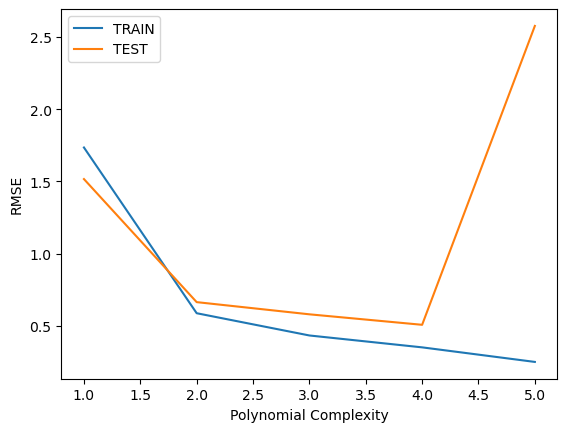

In [13]:
plt.plot(range(1,6),train_rmse[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [15]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity we go for degree=3